In [39]:
import os, sys
import re
import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

plt.rcParams.update({'font.size': 14})

In [2]:
testname_re = re.compile("test_(\d+)-(\d+).py")

In [3]:
testsuiteNameCache = {}
def getTestsuiteNameFromFile(file):
    global testsuiteNameCache
    file = file.replace("/home/bankde/", "/Users/bankde/Desktop/project/final_project/Volpy_main/")
    s = file.replace("-","/").split("/")
    cur_test = s[-3]+"/"+s[-2]
    with open(file, "r") as f:
        for line in f:
            if line.startswith("###### Description ######"):
                testsuite_name = (f.readline()).strip("#\ \n")
                testsuiteNameCache[cur_test] = testsuite_name
                return testsuite_name
            
def getTestsuiteName(file):
    global testsuiteNameCache
    file = file.replace("/home/bankde/", "/Users/bankde/Desktop/project/final_project/Volpy_main/")
    s = cur_file.replace("-","/").split("/")
    cur_test = s[-3]+"/"+s[-2]
    return testsuiteNameCache[cur_test]

In [4]:
result_file = "result_gcloud.json"
with open(result_file, "r") as f:
    raw_results = json.load(f)

In [5]:
args = type('', (), {})
args.data = "time"

In [6]:
result_dict = {}
for cur_pickle in raw_results["pickleSuites"]:
    result_dict[cur_pickle] = {}
    # First loop to init the dict with testsuite name
    for cur_file in raw_results[cur_pickle]:
        if cur_file.endswith("-1.py"):
            cur_testname = getTestsuiteNameFromFile(cur_file)
            if cur_testname in result_dict[cur_pickle]:
                raise Exception("Impossible flow") # Only one init file should exist.
            result_dict[cur_pickle][cur_testname] = [{} for i in range(2)] # 0/1 for init/test
    # Add the result to our result_dict
    for cur_file in raw_results[cur_pickle]:
        # Get args.data (default: "result") from raw_result
        results = {k: raw_results[cur_pickle][cur_file][k][args.data] if args.data in raw_results[cur_pickle][cur_file][k] else "NA" for k in raw_results[cur_pickle][cur_file]}
        if cur_file.endswith("-1.py"):
            result_dict[cur_pickle][getTestsuiteName(cur_file)][0] = results
        else:
            # There may be several test file
            result_dict[cur_pickle][getTestsuiteName(cur_file)][1].update(results)

In [7]:
# Beauty print with pandas
all_results = {}
for testsuite in result_dict[list(result_dict.keys())[0]]:
    df_all_pickles = []
    for cur_pickle in result_dict:
        df = pd.DataFrame(data=result_dict[cur_pickle][testsuite])
        df = df.fillna(' ').T
        df = df.rename(columns={0: "Init(%s)" % (cur_pickle), 1: "Test(%s)" % (cur_pickle)})
        df_all_pickles.append(df)
    result = pd.concat(df_all_pickles, axis=1)
    all_results[testsuite] = result
#     print(result)
#     result.plot(kind="box")
#     summary_fh.write("===== Testsuite: %s =====\n" % (testsuite))
#     summary_fh.write(str(result))
#     summary_fh.write("\n")

In [8]:
# For exec
exec_testsuiteNameCache = {}
def exec_getTestsuiteNameFromFile(file):
    global exec_testsuiteNameCache
    file = file.replace("/home/bankde/", "/Users/bankde/Desktop/project/final_project/Volpy_main/")
    with open(file, "r") as f:
        for line in f:
            if line.startswith("###### Description ######"):
                testsuite_name = (f.readline()).strip("#\ \n")
                exec_testsuiteNameCache[file] = testsuite_name
                return testsuite_name
            
def exec_getTestsuiteName(file):
    global exec_testsuiteNameCache
    file = file.replace("/home/bankde/", "/Users/bankde/Desktop/project/final_project/Volpy_main/")
    return exec_testsuiteNameCache[file]

In [9]:
# Load from exec results
exec_result_file = "../exec/result_gcloud.json"
with open(exec_result_file, "r") as f:
    exec_raw_results = json.load(f)
cur_pickle = "exec"
exec_result_dict = {}
exec_result_dict[cur_pickle] = {}
# First loop to init the dict with testsuite name
for cur_file in exec_raw_results[cur_pickle]:
    cur_testname = exec_getTestsuiteNameFromFile(cur_file)
    exec_result_dict[cur_pickle][cur_testname] = [{} for i in range(2)] # 0/1 for init/test
# Add the result to our result_dict
for cur_file in exec_raw_results[cur_pickle]:
    # Get args.data (default: "result") from raw_result
    results = {k: exec_raw_results[cur_pickle][cur_file][k][args.data] if args.data in exec_raw_results[cur_pickle][cur_file][k] else "NA" for k in exec_raw_results[cur_pickle][cur_file]}
    # For exec, there should be only Test, no init.
    exec_result_dict[cur_pickle][exec_getTestsuiteName(cur_file)][1] = results
    
exec_all_results = {}
for testsuite in exec_result_dict[list(exec_result_dict.keys())[0]]:
    df_all_pickles = []
    for cur_pickle in exec_result_dict:
        df = pd.DataFrame(data=exec_result_dict[cur_pickle][testsuite])
        df = df.fillna(' ').T
        df = df.rename(columns={0: "Init(%s)" % (cur_pickle), 1: "Test(%s)" % (cur_pickle)})
        df_all_pickles.append(df)
    result = pd.concat(df_all_pickles, axis=1)
    exec_all_results[testsuite] = result

In [31]:
# List all testsuite
for ts in all_results:
    print(ts)
    for test in all_results[ts].index:
        print("    %s" % test)

Closure
    test_func_closure
Recursive_function
    test_func_recursive
    test_func_recursive_double
Function_scope
    test_func_shared_scope
Functions
    test_func_chain
    test_func_simple
    test_func_simple_with_default_arg
Modules
    test_module_alias
    test_module_closure
    test_module_simple
Classes
    test_class_nested
    test_class_object
    test_class_simple
Inherit_class
    test_class_inherit
    test_class_inherit_instance
Distributed_sort
    test_distributed_sort


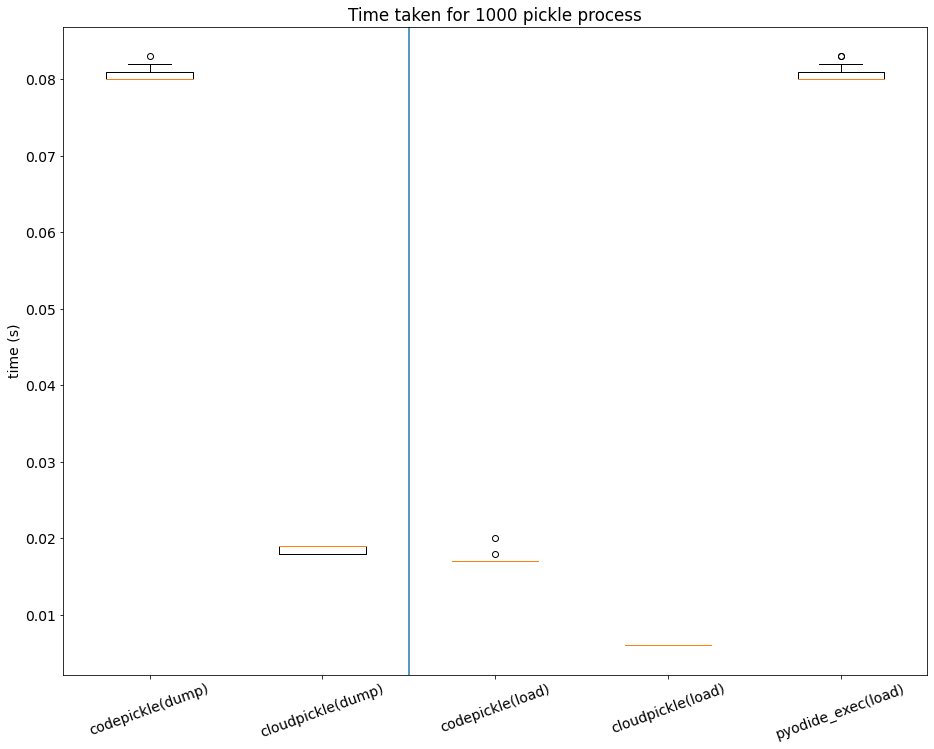

In [44]:
data = []
data.append(all_results["Functions"]["Init(codepickle)"]["test_func_simple"])
data.append(all_results["Functions"]["Init(cloudpickle)"]["test_func_simple"])
data.append(all_results["Functions"]["Test(codepickle)"]["test_func_simple"])
data.append(all_results["Functions"]["Test(cloudpickle)"]["test_func_simple"])
data.append(exec_all_results["Functions"]["Test(exec)"]["test_func_simple"])

fig = plt.figure(figsize =(12, 9))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken for 1000 pickle process')
xtick = ["codepickle(dump)", "cloudpickle(dump)", "codepickle(load)", "cloudpickle(load)", "pyodide_exec(load)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (s)')
plt.axvline(x=2.5)
fig.show()

/var/folders/pv/5ntnhsd934q99bbj_55cvf8w0000gn/T/ipykernel_67445/719004991.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


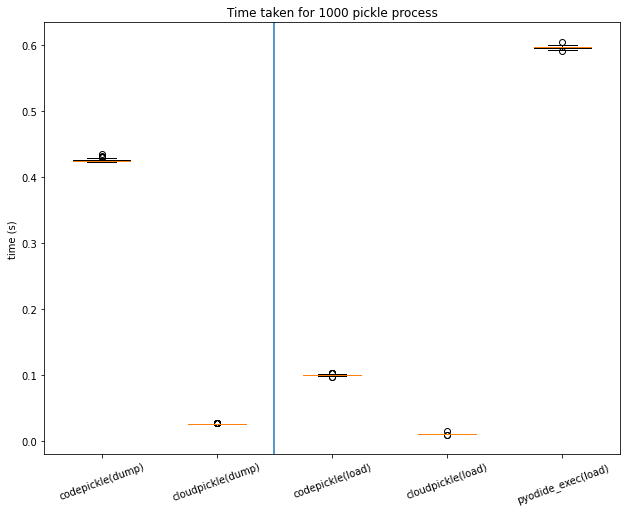

In [15]:
data = []
data.append(all_results["Distributed_sort"]["Init(codepickle)"]["test_distributed_sort"])
data.append(all_results["Distributed_sort"]["Init(cloudpickle)"]["test_distributed_sort"])
data.append(all_results["Distributed_sort"]["Test(codepickle)"]["test_distributed_sort"])
data.append(all_results["Distributed_sort"]["Test(cloudpickle)"]["test_distributed_sort"])
data.append(exec_all_results["Distributed_sort"]["Test(exec)"]["test_distributed_sort"])

fig = plt.figure(figsize =(8, 6))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Time taken for 1000 pickle process')
xtick = ["codepickle(dump)", "cloudpickle(dump)", "codepickle(load)", "cloudpickle(load)", "pyodide_exec(load)"]
ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
ax.set_ylabel('time (s)')
plt.axvline(x=2.5)
fig.show()

In [58]:
def myPlot(all_results, exec_all_results, testsuite, test):
    data = []
    print(testsuite, test)
    data.append(all_results[testsuite]["Init(codepickle)"][test])
    data.append(all_results[testsuite]["Init(cloudpickle)"][test])
    data.append(all_results[testsuite]["Test(codepickle)"][test])
    data.append(all_results[testsuite]["Test(cloudpickle)"][test])
    if exec_all_results[testsuite]["Test(exec)"][test] != "NA":
        data.append(exec_all_results[testsuite]["Test(exec)"][test])
    else:
        data.append(0)

    fig = plt.figure(figsize =(8, 6))
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data)
    ax.set_title('Time taken for 1000 pickle process')
    xtick = ["codepickle(dump)", "cloudpickle(dump)", "codepickle(load)", "cloudpickle(load)", "pyodide_exec(load)"]
    ax.set_xticks(range(1,1+len(xtick)), xtick, rotation=20)
    ax.set_ylabel('time (s)')
    plt.axvline(x=2.5)
    plt.title('Serialization performance: %s - %s' % (testsuite, test))
    fig.show()

In [59]:
exec_all_results["Classes"]["Test(exec)"]["test_class_object"]

'NA'

Closure test_func_closure
Recursive_function test_func_recursive
Recursive_function test_func_recursive_double
Function_scope test_func_shared_scope
Functions test_func_chain
Functions test_func_simple
Functions test_func_simple_with_default_arg
Modules test_module_alias
Modules test_module_closure
Modules test_module_simple
Classes test_class_nested
Classes test_class_object
Classes test_class_simple
Inherit_class test_class_inherit
Inherit_class test_class_inherit_instance
Distributed_sort test_distributed_sort


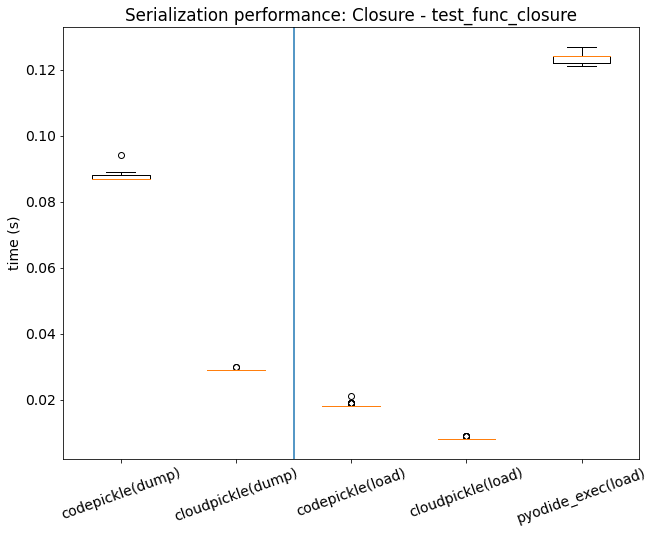

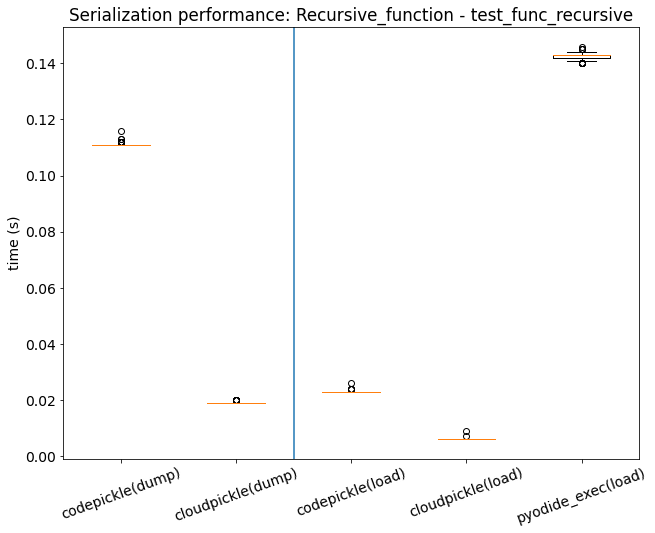

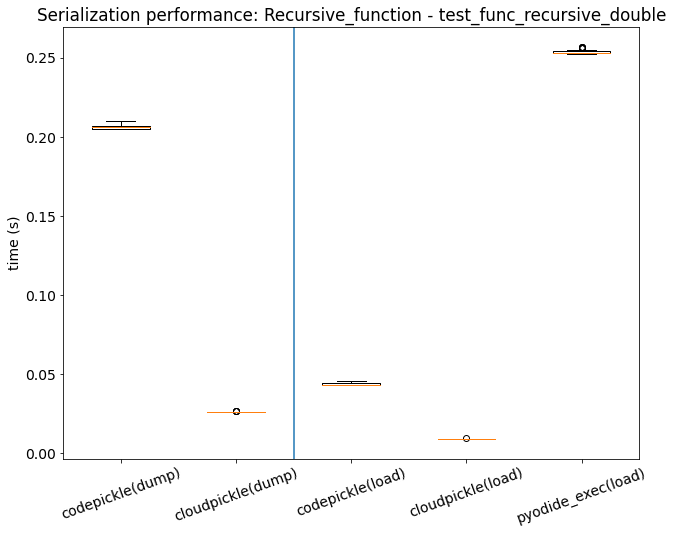

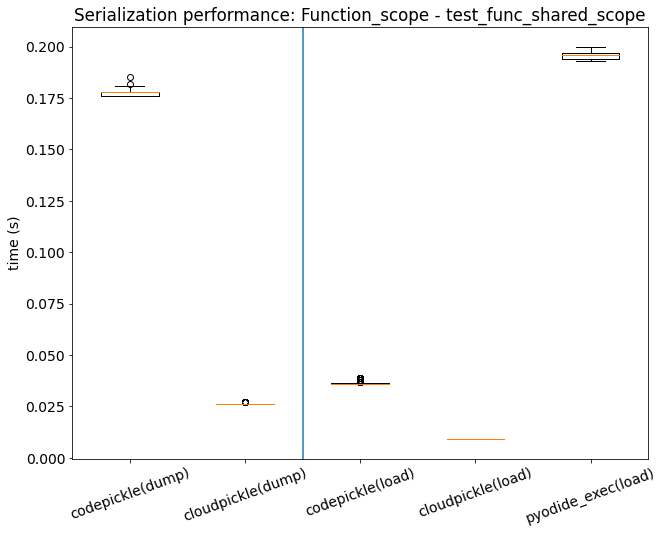

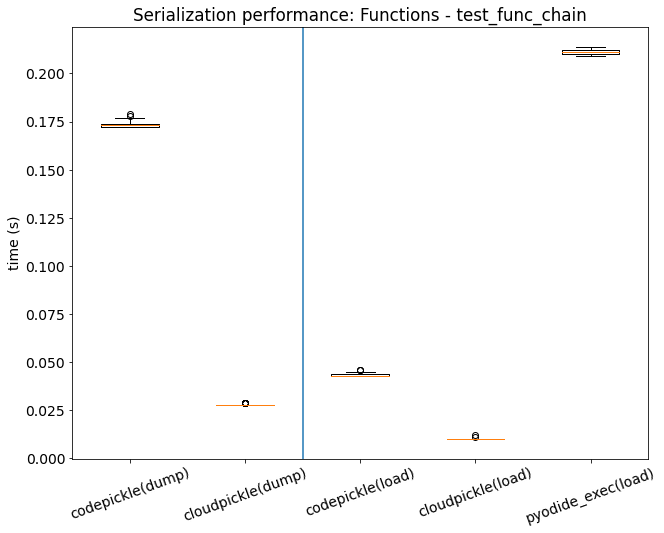

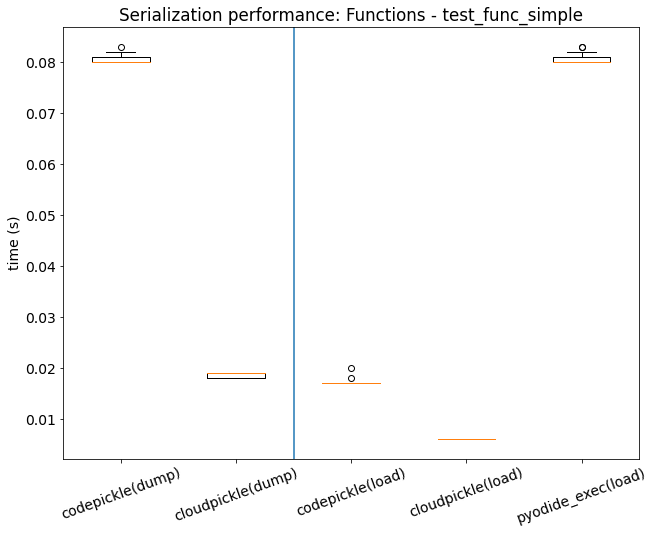

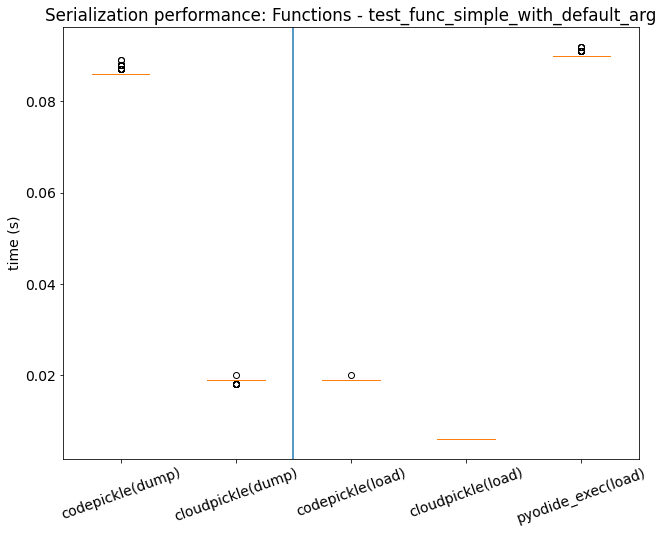

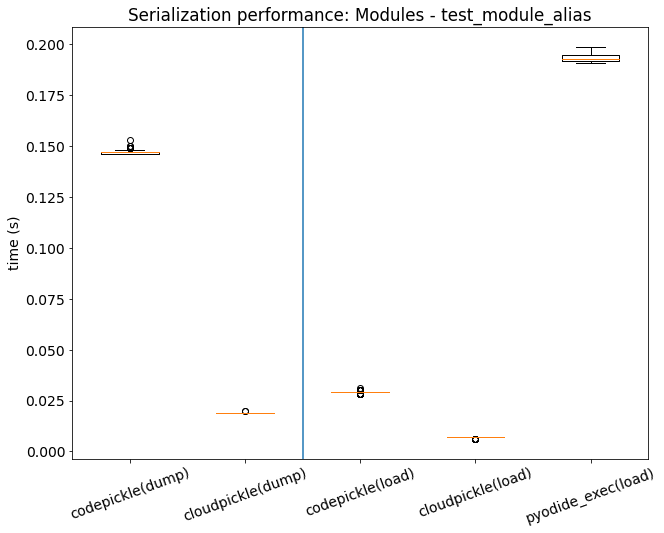

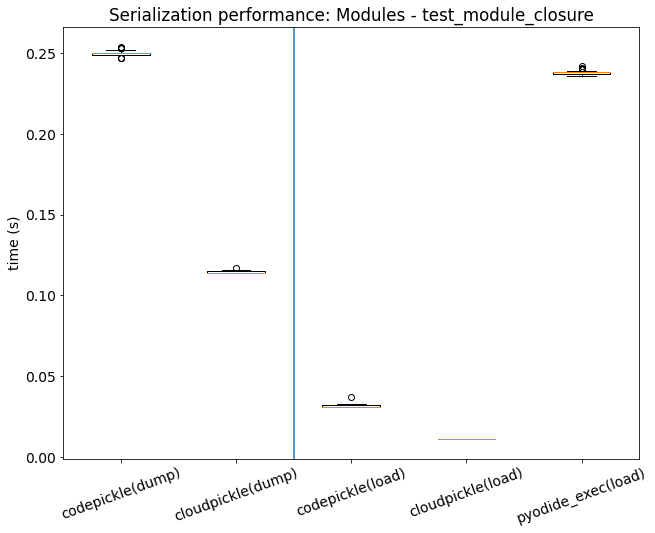

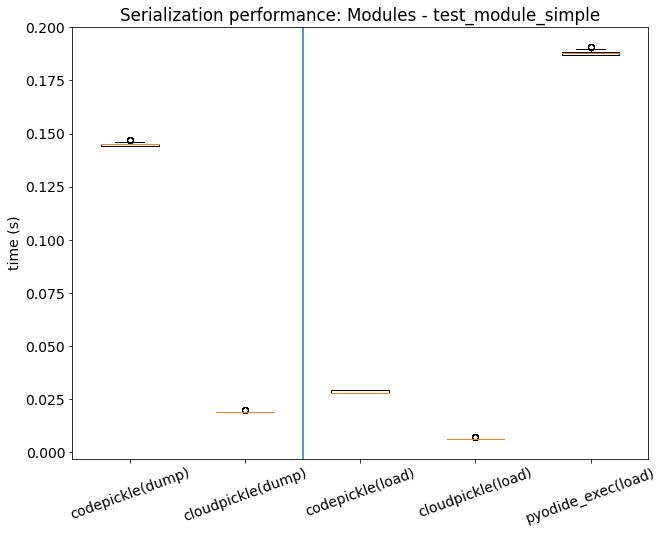

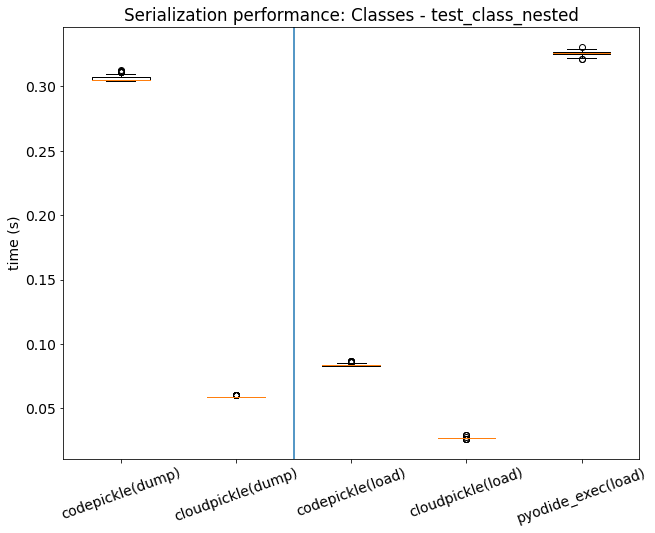

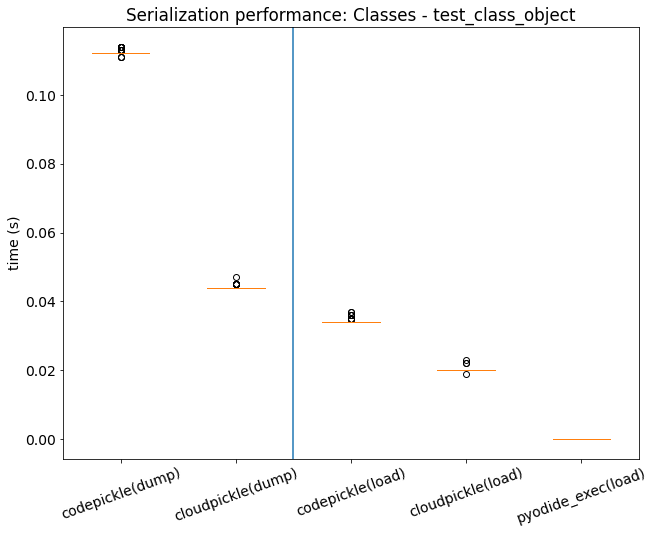

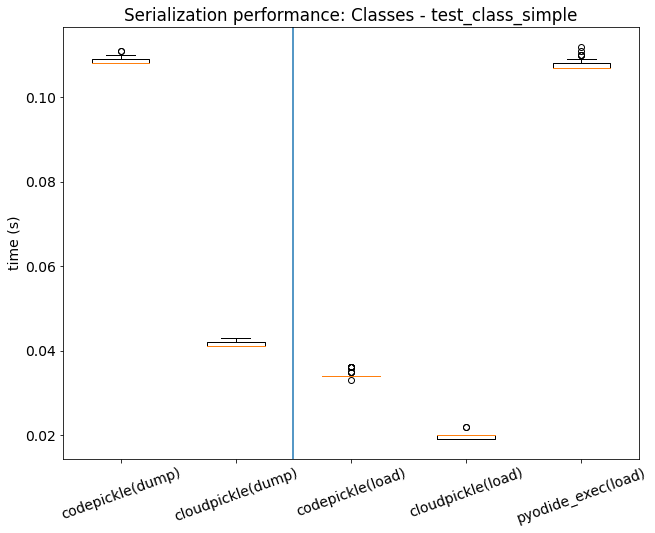

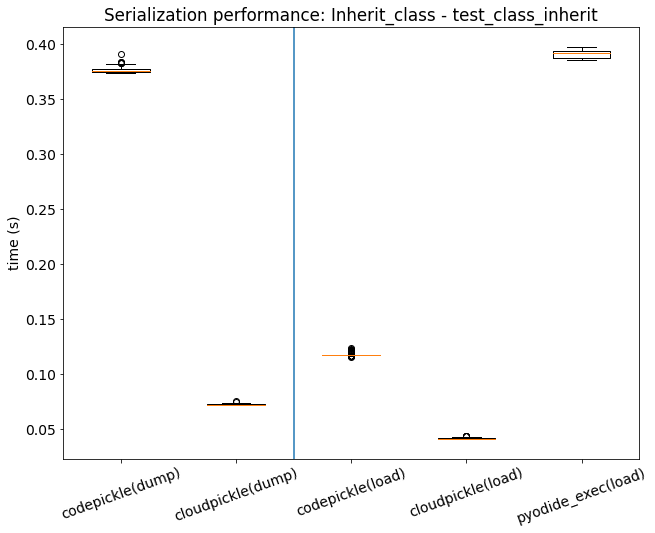

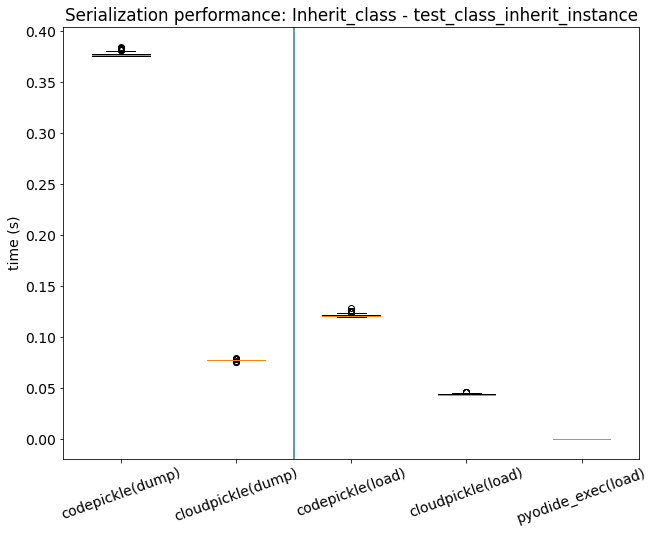

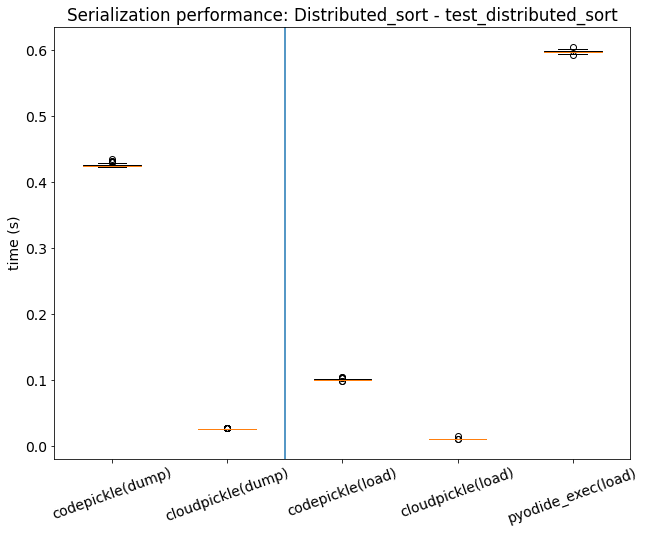

In [60]:
# List all testsuite
for ts in all_results:
    for test in all_results[ts].index:
        myPlot(all_results, exec_all_results, ts, test)

In [64]:
# List all testsuite
for testsuite in all_results:
    print(testsuite)
    for test in all_results[testsuite].index:
        print("  %s" % (test))
        print("    Init(codepickle): %.3f" % np.mean(all_results[testsuite]["Init(codepickle)"][test]))
        print("    Init(cloudpickle): %.3f" % np.mean(all_results[testsuite]["Init(cloudpickle)"][test]))
        print("    Test(codepickle): %.3f" % np.mean(all_results[testsuite]["Test(codepickle)"][test]))
        print("    Test(cloudpickle): %.3f" % np.mean(all_results[testsuite]["Test(cloudpickle)"][test]))
        if exec_all_results[testsuite]["Test(exec)"][test] == "NA":
            print("    Test(exec): -")
        else:
            print("    Test(exec): %.3f" % np.mean(exec_all_results[testsuite]["Test(exec)"][test]))

Closure
  test_func_closure
    Init(codepickle): 0.087
    Init(cloudpickle): 0.029
    Test(codepickle): 0.018
    Test(cloudpickle): 0.008
    Test(exec): 0.123
Recursive_function
  test_func_recursive
    Init(codepickle): 0.111
    Init(cloudpickle): 0.019
    Test(codepickle): 0.023
    Test(cloudpickle): 0.006
    Test(exec): 0.143
  test_func_recursive_double
    Init(codepickle): 0.206
    Init(cloudpickle): 0.026
    Test(codepickle): 0.044
    Test(cloudpickle): 0.009
    Test(exec): 0.254
Function_scope
  test_func_shared_scope
    Init(codepickle): 0.178
    Init(cloudpickle): 0.026
    Test(codepickle): 0.037
    Test(cloudpickle): 0.009
    Test(exec): 0.196
Functions
  test_func_chain
    Init(codepickle): 0.173
    Init(cloudpickle): 0.028
    Test(codepickle): 0.044
    Test(cloudpickle): 0.010
    Test(exec): 0.211
  test_func_simple
    Init(codepickle): 0.080
    Init(cloudpickle): 0.019
    Test(codepickle): 0.017
    Test(cloudpickle): 0.006
    Test(exec): 0.080